# Minimal Example: Applying Naive AutoML to iris

In [1]:
import sklearn.datasets
import naiveautoml

X, y = sklearn.datasets.load_iris(return_X_y=True)
naml = naiveautoml.NaiveAutoML(show_progress = True, max_hpo_iterations=10)
naml.fit(X, y)

Progress for algorithm selection:


33it [00:03, 10.90it/s]                                                                                                                                                                       


Progress for parameter tuning:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 46.24it/s]


In [2]:
naml.chosen_model

Pipeline(steps=[('data-pre-processor', PowerTransformer()),
                ('learner',
                 LinearDiscriminantAnalysis(tol=0.005177620176854236))])

In [3]:
naml.history

,time,pl,score_internal,scores,new_best
0,0.027648,"Pipeline(steps=[('learner', BernoulliNB())])",-1.0986,{'neg_log_loss': -1.0986},True
1,0.038259,"Pipeline(steps=[('learner', DecisionTreeClassi...",-1.6118,{'neg_log_loss': -1.6118},False
2,0.465659,"Pipeline(steps=[('learner', ExtraTreesClassifi...",-0.1035,{'neg_log_loss': -0.1035},True
3,0.479663,"Pipeline(steps=[('learner', GaussianNB())])",-0.1261,{'neg_log_loss': -0.1261},False
4,1.260386,"Pipeline(steps=[('learner', GradientBoostingCl...",-0.4469,{'neg_log_loss': -0.4469},False
5,1.272282,"Pipeline(steps=[('learner', KNeighborsClassifi...",-0.7390,{'neg_log_loss': -0.739},False
6,1.286341,"Pipeline(steps=[('learner', LinearDiscriminant...",-0.0582,{'neg_log_loss': -0.0582},True
7,1.306940,"Pipeline(steps=[('learner', SVC(kernel='linear...",-0.1052,{'neg_log_loss': -0.1052},False
8,1.336538,"Pipeline(steps=[('learner', SVC(probability=Tr...",-0.1120,{'neg_log_loss': -0.112},False
9,1.358205,"Pipeline(steps=[('learner', SVC(kernel='poly',...",-0.1267,{'neg_log_loss': -0.1267},False


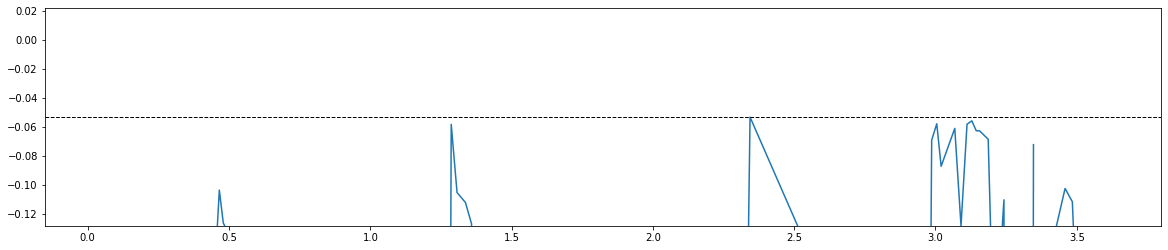

In [4]:
import matplotlib.pyplot as plt

def plot_history(naml):
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot(naml.history["time"], naml.history["score_internal"])
    ax.axhline(naml.history["score_internal"].max(), linestyle="--", color="black", linewidth=1)
    max_val = naml.history["score_internal"].max()
    median_val = naml.history["score_internal"].median()
    ax.set_ylim([median_val, max_val + (max_val - median_val)])
    plt.show()

plot_history(naml)

## Apply Naive AutoML to the eucalyptus dataset (with categoricals and missing values)

In [5]:
import openml

def get_dataset(openmlid):
    ds = openml.datasets.get_dataset(openmlid)
    df = ds.get_data()[0]
    X = df.drop(columns=[ds.default_target_attribute])
    y = df[ds.default_target_attribute]
    return X, y

In [6]:
X, y = get_dataset(188)
print(f"Num of missing values: {X.isna().sum().sum()}")
X

Num of missing values: 448


,Abbrev,Rep,Locality,Map_Ref,Latitude,Altitude,Rainfall,Frosts,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
0,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,co,1520.0,18.45,9.96,40.0,4.0,3.0,3.5,4.0,3.5
1,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,fr,1487.0,13.15,9.65,90.0,4.5,4.0,3.5,3.5,3.0
2,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,ma,1362.0,10.32,6.50,50.0,2.3,2.5,3.0,3.5,3.0
3,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,nd,1596.0,14.80,9.48,70.0,3.7,3.0,3.3,4.0,3.5
4,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,ni,2088.0,14.50,10.78,90.0,4.0,2.7,3.3,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100.0,1250.0,-2.0,1983.0,fa,2548.0,41.63,12.64,28.0,4.2,3.2,2.3,1.9,1.7
732,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100.0,1250.0,-2.0,1983.0,fr,2552.0,33.35,10.61,33.0,4.5,4.0,2.8,3.0,1.5
733,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100.0,1250.0,-2.0,1983.0,ni,2568.0,28.21,9.47,94.0,4.6,3.0,2.0,1.8,1.2
734,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100.0,1250.0,-2.0,1983.0,ob,1522.0,27.36,11.49,67.0,4.7,3.3,3.4,3.4,3.0


In [7]:
naml = naiveautoml.NaiveAutoML(show_progress = True, timeout=120, max_hpo_iterations=10)
naml.fit(X, y)

Progress for algorithm selection:


32it [01:11,  2.23s/it]                        


Progress for parameter turning:


 10%|█         | 1/10 [01:25<12:48, 85.36s/it]


In [8]:
print(naml.chosen_model)

Pipeline(steps=[('impute_and_binarize',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Rep', 'Altitude',
                                                   'Rainfall', 'Frosts', 'Year',
                                                   'PMCno', 'DBH', 'Ht', 'Surv',
                                                   'Vig', 'Ins_res', 'Stem_Fm',
                                                   'Crown_Fm', 'Brnch_Fm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binarizer',
        

In [9]:
naml.history

,time,pl,score_internal,scores,new_best
0,0.250810,"Pipeline(steps=[('impute_and_binarize',\n ...",-2.0017,{'neg_log_loss': -2.0017},True
1,0.508713,"Pipeline(steps=[('impute_and_binarize',\n ...",-14.1270,{'neg_log_loss': -14.127},False
2,1.462306,"Pipeline(steps=[('impute_and_binarize',\n ...",-0.8939,{'neg_log_loss': -0.8939},True
3,1.665776,"Pipeline(steps=[('impute_and_binarize',\n ...",-9.0080,{'neg_log_loss': -9.008},False
4,6.714869,"Pipeline(steps=[('impute_and_binarize',\n ...",-0.8541,{'neg_log_loss': -0.8541},True
5,6.934485,"Pipeline(steps=[('impute_and_binarize',\n ...",-6.5575,{'neg_log_loss': -6.5575},False
6,7.212123,"Pipeline(steps=[('impute_and_binarize',\n ...",-0.9110,{'neg_log_loss': -0.911},False
7,17.435528,"Pipeline(steps=[('impute_and_binarize',\n ...",NaN,{'neg_log_loss': nan},False
8,18.653693,"Pipeline(steps=[('impute_and_binarize',\n ...",-1.4943,{'neg_log_loss': -1.4943},False
9,19.707285,"Pipeline(steps=[('impute_and_binarize',\n ...",-1.4815,{'neg_log_loss': -1.4815},False


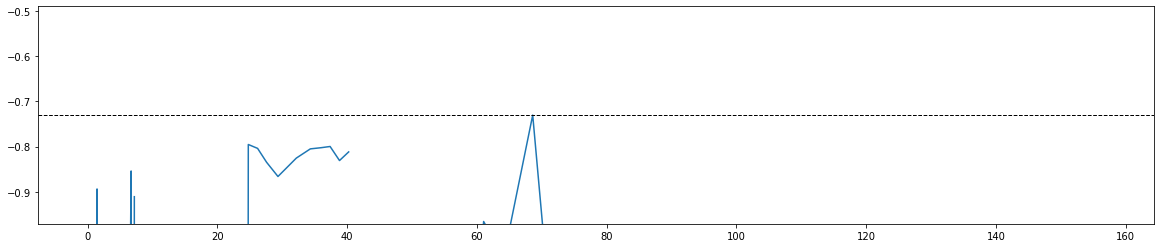

In [10]:
plot_history(naml)

# Apply Naive AutoML to breast cancer with logging enabled

In [11]:
# configure logger
import logging
logger = logging.getLogger('naiveautoml')
logger.setLevel(logging.INFO)
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
formatter = logging.Formatter(
    '%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

logger = logging.getLogger('naiveautoml.evalpool')
logger.setLevel(logging.WARN)
ch = logging.StreamHandler()
ch.setLevel(logging.WARN)
formatter = logging.Formatter(
    '%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

In [12]:
%%time
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)

naml = naiveautoml.NaiveAutoML(show_progress = True, timeout=180, max_hpo_iterations = 1000)
naml.fit(X_train, y_train)

2023-04-01 18:46:20,194 - naiveautoml - INFO - Automatically inferred task type: classification
2023-04-01 18:46:20,196 - naiveautoml - INFO - Optimizing pipeline for data with shape (426, 30).
        Timeout: 180
        Timeout per execution: 10
        Scoring: roc_auc
2023-04-01 18:46:20,203 - naiveautoml - INFO - There are 0 categorical features, which will be binarized.
2023-04-01 18:46:20,204 - naiveautoml - INFO - Missing values for the different attributes are [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0].
2023-04-01 18:46:20,205 - naiveautoml - INFO - These are the components used by NaiveAutoML in the upcoming process (by steps):
data-pre-processor
	sklearn.preprocessing._data.MinMaxScaler
	sklearn.preprocessing._data.Normalizer
	sklearn.preprocessing._data.PowerTransformer
	sklearn.preprocessing._data.QuantileTransformer
	sklearn.preprocessing._data.RobustScaler
	sklearn.preprocessing._data.StandardScaler
	sklearn.feature_selection._variance_threshold.Varia

(569, 30)
(569,)
(426, 30)
(143, 30)
Progress for algorithm selection:


  0%|          | 0/31 [00:00<?, ?it/s]2023-04-01 18:46:20,211 - naiveautoml - INFO - --------------------------------------------------
2023-04-01 18:46:20,212 - naiveautoml - INFO - Selecting component for step with name: learner
2023-04-01 18:46:20,212 - naiveautoml - INFO - --------------------------------------------------
2023-04-01 18:46:20,213 - naiveautoml - INFO - Evaluating sklearn.naive_bayes.BernoulliNB. Timeout: 10. Remaining time: 169.98337769508362
2023-04-01 18:46:20,237 - naiveautoml - INFO - Evaluating sklearn.tree._classes.DecisionTreeClassifier. Timeout: 10. Remaining time: 169.95937132835388
2023-04-01 18:46:20,277 - naiveautoml - INFO - Evaluating sklearn.ensemble._forest.ExtraTreesClassifier. Timeout: 10. Remaining time: 169.91919231414795
 10%|▉         | 3/31 [00:00<00:07,  3.60it/s]2023-04-01 18:46:21,045 - naiveautoml - INFO - Evaluating sklearn.naive_bayes.GaussianNB. Timeout: 10. Remaining time: 169.1510784626007
2023-04-01 18:46:21,072 - naiveautoml - INFO

Progress for parameter turning:


  0%|          | 0/1000 [00:00<?, ?it/s]2023-04-01 18:46:54,007 - naiveautoml - INFO - Entering optimization round 1
2023-04-01 18:46:54,212 - naiveautoml.hpo - INFO - Observed score of 0.9558 for sklearn.kernel_approximation.Nystroem with params {'kernel': 'poly', 'n_components': 590, 'coef0': 0.03137465389389704, 'degree': 4, 'gamma': 0.00420464796744493}
2023-04-01 18:46:58,324 - naiveautoml.hpo - INFO - Observed score of 0.9929 for sklearn.ensemble._forest.ExtraTreesClassifier with params {'bootstrap': 'False', 'criterion': 'gini', 'max_depth': 'None', 'max_features': 0.9170112053386394, 'max_leaf_nodes': 'None', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 18, 'min_weight_fraction_leaf': 0.0}
2023-04-01 18:46:58,340 - naiveautoml - INFO - Updating new best internal pipeline to Pipeline(steps=[('data-pre-processor', MinMaxScaler()),
                ('feature-pre-processor', Nystroem()),
                ('learner', ExtraTreesClassifier())])
  0%|        

  1%|          | 11/1000 [00:40<59:01,  3.58s/it]  2023-04-01 18:47:34,490 - naiveautoml - INFO - Entering optimization round 12
2023-04-01 18:47:34,615 - naiveautoml.hpo - INFO - Observed score of 0.9656 for sklearn.kernel_approximation.Nystroem with params {'kernel': 'cosine', 'n_components': 4165}
2023-04-01 18:47:38,396 - naiveautoml.hpo - INFO - Observed score of 0.994 for sklearn.ensemble._forest.ExtraTreesClassifier with params {'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 'None', 'max_features': 0.32323254351958397, 'max_leaf_nodes': 'None', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0}
  1%|          | 12/1000 [00:44<1:00:39,  3.68s/it]2023-04-01 18:47:38,409 - naiveautoml - INFO - Entering optimization round 13
2023-04-01 18:47:38,507 - naiveautoml.hpo - INFO - Observed score of 0.9745 for sklearn.kernel_approximation.Nystroem with params {'kernel': 'chi2', 'n_components': 134, 'gamma': 0.00031549601791

2023-04-01 18:48:19,628 - naiveautoml.hpo - INFO - Observed score of 0.9896 for sklearn.ensemble._forest.ExtraTreesClassifier with params {'bootstrap': 'True', 'criterion': 'entropy', 'max_depth': 'None', 'max_features': 0.6669879373412323, 'max_leaf_nodes': 'None', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 14, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0}
  2%|▏         | 23/1000 [01:25<1:05:06,  4.00s/it]2023-04-01 18:48:19,638 - naiveautoml - INFO - Entering optimization round 24
2023-04-01 18:48:19,865 - naiveautoml.hpo - INFO - Observed score of 0.9578 for sklearn.kernel_approximation.Nystroem with params {'kernel': 'rbf', 'n_components': 366, 'gamma': 0.008215364506747355}
2023-04-01 18:48:23,349 - naiveautoml.hpo - INFO - Observed score of 0.9908 for sklearn.ensemble._forest.ExtraTreesClassifier with params {'bootstrap': 'True', 'criterion': 'entropy', 'max_depth': 'None', 'max_features': 0.5585051544440519, 'max_leaf_nodes': 'None', 'min_impurity_decrease': 

2023-04-01 18:49:01,195 - naiveautoml.hpo - INFO - Observed score of 0.5031 for sklearn.kernel_approximation.Nystroem with params {'kernel': 'sigmoid', 'n_components': 302, 'coef0': 0.3066401603337734, 'gamma': 0.0010389677331474425}
2023-04-01 18:49:04,664 - naiveautoml.hpo - INFO - Observed score of 0.9895 for sklearn.ensemble._forest.ExtraTreesClassifier with params {'bootstrap': 'False', 'criterion': 'entropy', 'max_depth': 'None', 'max_features': 0.9520609820184454, 'max_leaf_nodes': 'None', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0}
  4%|▎         | 35/1000 [02:10<1:00:34,  3.77s/it]2023-04-01 18:49:04,674 - naiveautoml - INFO - Entering optimization round 36
2023-04-01 18:49:04,813 - naiveautoml.hpo - INFO - Observed score of 0.5 for sklearn.kernel_approximation.Nystroem with params {'kernel': 'sigmoid', 'n_components': 3783, 'coef0': 0.9853553996088782, 'gamma': 0.004286524308991213}
2023-04-01 18:49:08,375 - 

CPU times: user 4min 37s, sys: 2.43 s, total: 4min 39s
Wall time: 2min 48s


In [13]:
naml.history

,time,pl,score_internal,scores,new_best
0,0.040150,"Pipeline(steps=[('learner', BernoulliNB())])",0.5206,{'roc_auc': 0.5206},True
1,0.080096,"Pipeline(steps=[('learner', DecisionTreeClassi...",0.9066,{'roc_auc': 0.9066},True
2,0.847159,"Pipeline(steps=[('learner', ExtraTreesClassifi...",0.9955,{'roc_auc': 0.9955},True
3,0.875509,"Pipeline(steps=[('learner', GaussianNB())])",0.9886,{'roc_auc': 0.9886},False
4,2.745211,"Pipeline(steps=[('learner', GradientBoostingCl...",0.9933,{'roc_auc': 0.9933},False
...,...,...,...,...,...
99,160.862095,"Pipeline(steps=[('learner',\n ...",0.9909,{'roc_auc': 0.9909},False
100,160.999330,"Pipeline(steps=[('feature-pre-processor',\n ...",0.5031,{'roc_auc': 0.5031},False
101,164.468740,"Pipeline(steps=[('learner',\n ...",0.9895,{'roc_auc': 0.9895},False
102,164.617635,"Pipeline(steps=[('feature-pre-processor',\n ...",0.5000,{'roc_auc': 0.5},False


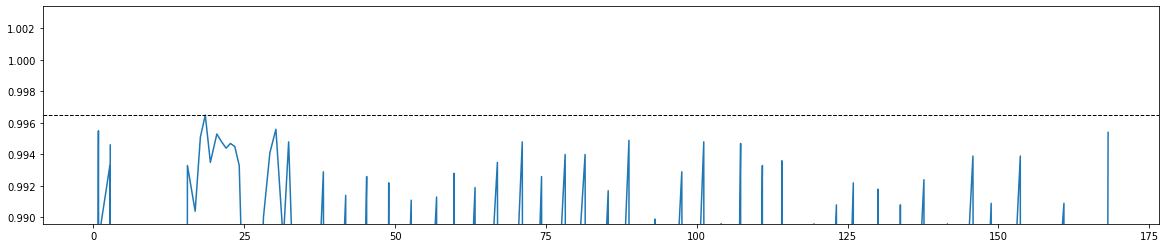

In [14]:
plot_history(naml)